## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to use only the first GPU
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
    print("GPU found and memory growth enabled!")
  except RuntimeError as e:
    print(e)
else:
  print("No GPU detected.")
  

# Check for GPUs
gpus = tf.config.list_physical_devices('GPU')

if gpus:
  # Training on GPU if at least one GPU is found
  print("Training on GPU!")
else:
  # Training on CPU if no GPUs are detected
  print("Training on CPU.")


2024-05-01 20:57:13.900018: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 20:57:13.900117: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 20:57:13.969537: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-01 20:57:14.113261: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 20:57:16.127989: W tensorflow/compiler/tf2

GPU found and memory growth enabled!
Training on GPU!


2024-05-01 20:57:18.340442: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 20:57:18.548495: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 20:57:18.548560: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
import splitfolders
import PIL
import glob
import cv2
import time
from sklearn.metrics import confusion_matrix, confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
import sys
import shutil
import glob as gb
import pickle
from sklearn.svm import SVC

In [4]:


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization, LSTM, TimeDistributed, GRU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential, Model
from sklearn.model_selection import train_test_split

In [5]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-05-01 20:58:02.432453: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


True

2024-05-01 20:58:02.432598: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 20:58:02.432645: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 20:58:02.721418: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 20:58:02.721504: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 20:58:02.721515: I tensorflow/core/common_runtime/gpu/gpu

# Importing Dataset

In [4]:
# class config:
    
#     data_path = 'Dataset/'
    
#     path_train = "./output/train"
#     path_test = "./output/test"

In [5]:
# splitfolders.ratio(config.data_path, output="output", seed=101, ratio=(.8, .2))

# CNN

In [48]:
BATCH_SIZE = 128
IMAGE_SHAPE = (224, 224)

In [49]:
TRAIN_PATH = "output/train"
VAL_PATH = "output/val"

In [50]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_gen = datagen.flow_from_directory(directory = TRAIN_PATH, 
                                          class_mode="categorical",
                                          target_size = IMAGE_SHAPE,
                                          batch_size = BATCH_SIZE,
                                          color_mode='rgb',
                                          seed = 1234,
                                          shuffle = True)

val_gen = datagen.flow_from_directory(directory = VAL_PATH, 
                                          class_mode="categorical",
                                          target_size = IMAGE_SHAPE,
                                          batch_size = BATCH_SIZE,
                                          color_mode='rgb',
                                          seed = 1234,
                                          shuffle = True)

Found 47658 images belonging to 15 classes.
Found 11919 images belonging to 15 classes.


In [51]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [22]:
#suraj tests please ignore
import tensorflow as tf

# Check for GPU availability
if tf.config.list_physical_devices('GPU'):
    print("GPU is available!")

    # Create a large tensor on the GPU
    with tf.device('/device:GPU:0'):  # Explicitly place on GPU (optional)
        large_tensor = tf.random.normal((1024, 1024))

    # Perform computationally intensive operations (adjust for your needs)
    for _ in range(100):
        large_tensor = tf.matmul(large_tensor, large_tensor)

    # GPU memory usage (optional)
    print(f"GPU memory usage: {tf.config.experimental.list_physical_devices('GPU')}")
else:
    print("GPU is not available.")



GPU is available!
GPU memory usage: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [52]:
model = Sequential()
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(256, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(384, (3, 3), activation='relu'))
model.add(Conv2D(384, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))

In [53]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy',f1_score,recall_m,precision_m])
history = model.fit(train_gen, validation_data=val_gen, epochs=15, steps_per_epoch=len(train_gen), validation_steps=len(val_gen))

Epoch 1/15
373/373 [==============================] - 262s 688ms/step - loss: 1.1112 - accuracy: 0.5287 - f1_score: 0.4698 - recall_m: 0.4063 - precision_m: 0.6044 - val_loss: 0.6922 - val_accuracy: 0.6617 - val_f1_score: 0.6431 - val_recall_m: 0.6008 - val_precision_m: 0.6922
Epoch 2/15
373/373 [==============================] - 246s 659ms/step - loss: 0.5839 - accuracy: 0.7201 - f1_score: 0.7116 - recall_m: 0.6837 - precision_m: 0.7426 - val_loss: 0.5405 - val_accuracy: 0.7332 - val_f1_score: 0.7284 - val_recall_m: 0.7104 - val_precision_m: 0.7475
Epoch 3/15
373/373 [==============================] - 262s 702ms/step - loss: 0.4796 - accuracy: 0.7719 - f1_score: 0.7685 - recall_m: 0.7515 - precision_m: 0.7866 - val_loss: 0.4235 - val_accuracy: 0.8147 - val_f1_score: 0.8132 - val_recall_m: 0.8028 - val_precision_m: 0.8239
Epoch 4/15
373/373 [==============================] - 242s 650ms/step - loss: 0.4083 - accuracy: 0.8148 - f1_score: 0.8132 - recall_m: 0.7996 - precision_m: 0.8274 - 

In [42]:
model.save('model/cnn.h5')

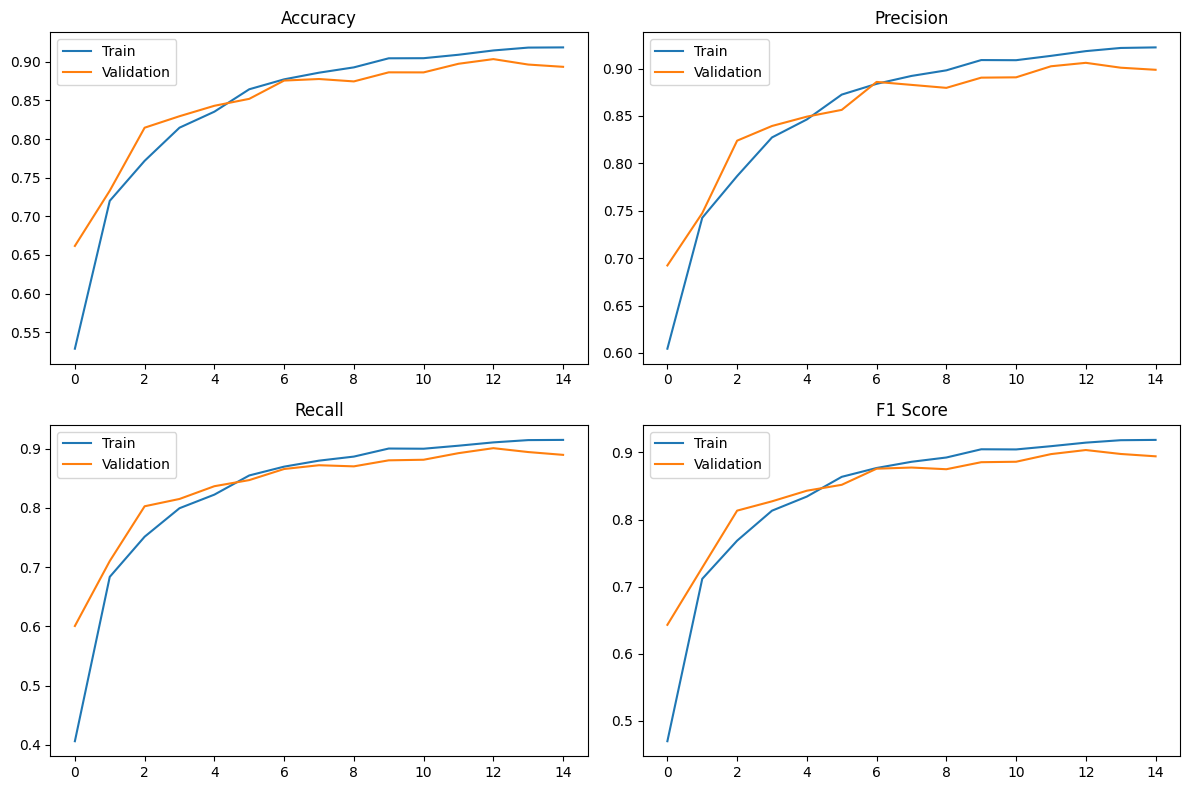

In [55]:
train_acc = history.history['accuracy']
train_recall = history.history['recall_m']
train_precision = history.history['precision_m']
train_f1 = history.history['f1_score']
val_acc = history.history['val_accuracy']
val_recall = history.history['val_recall_m']
val_precision = history.history['val_precision_m']
val_f1 = history.history['val_f1_score']

# Create a figure and subplot for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy
axs[0, 0].plot(train_acc, label='Train')
axs[0, 0].plot(val_acc, label='Validation')
axs[0, 0].set_title('Accuracy')
axs[0, 0].legend()

# Plot precision
axs[0, 1].plot(train_precision, label='Train')
axs[0, 1].plot(val_precision, label='Validation')
axs[0, 1].set_title('Precision')
axs[0, 1].legend()

# Plot recall
axs[1, 0].plot(train_recall, label='Train')
axs[1, 0].plot(val_recall, label='Validation')
axs[1, 0].set_title('Recall')
axs[1, 0].legend()

# Plot F1 score
axs[1, 1].plot(train_f1, label='Train')
axs[1, 1].plot(val_f1, label='Validation')
axs[1, 1].set_title('F1 Score')
axs[1, 1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [56]:
a1 = history.history['accuracy'][-1]
f1 = history.history['f1_score'][-1]
p1 = history.history['precision_m'][-1]
r1 = history.history['recall_m'][-1]

In [57]:
print('Accuracy = ' + str(a1))
print('Precision = ' + str(p1))
print('F1 Score = ' + str(f1))
print('Recall = ' + str(r1))

Accuracy = 0.9186705350875854
Precision = 0.9223446249961853
F1 Score = 0.9185765385627747
Recall = 0.9148763418197632


# Xception

In [58]:
BATCH_SIZE = 64
IMAGE_SHAPE = (224, 224)

TRAIN_PATH = "output/train"
VAL_PATH = "output/val"

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_gen = datagen.flow_from_directory(directory = TRAIN_PATH, 
                                          class_mode="categorical",
                                          target_size = IMAGE_SHAPE,
                                          batch_size = BATCH_SIZE,
                                          color_mode='rgb',
                                          seed = 1234,
                                          shuffle = True)

val_gen = datagen.flow_from_directory(directory = VAL_PATH, 
                                          class_mode="categorical",
                                          target_size = IMAGE_SHAPE,
                                          batch_size = BATCH_SIZE,
                                          color_mode='rgb',
                                          seed = 1234,
                                          shuffle = True)

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


Found 47658 images belonging to 15 classes.
Found 11919 images belonging to 15 classes.


In [59]:
inc = tf.keras.applications.xception.Xception(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='max')


x31 = Flatten()(inc.output)
predictionss = Dense(15, activation='softmax')(x31)


model = Model(inputs = inc.inputs, outputs = predictionss)
model.summary()

83683744/83683744 [==============================] - 7s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_5[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy',f1_score,recall_m,precision_m])
history = model.fit(train_gen, validation_data=val_gen, epochs=15, steps_per_epoch=len(train_gen), validation_steps=len(val_gen))

Epoch 1/15
745/745 [==============================] - 219s 290ms/step - loss: 0.2201 - accuracy: 0.9168 - f1_score: 0.9152 - recall_m: 0.9102 - precision_m: 0.9214 - val_loss: 0.4645 - val_accuracy: 0.8890 - val_f1_score: 0.8887 - val_recall_m: 0.8839 - val_precision_m: 0.8936
Epoch 2/15
745/745 [==============================] - 212s 284ms/step - loss: 0.0858 - accuracy: 0.9703 - f1_score: 0.9702 - recall_m: 0.9689 - precision_m: 0.9714 - val_loss: 0.1225 - val_accuracy: 0.9552 - val_f1_score: 0.9555 - val_recall_m: 0.9542 - val_precision_m: 0.9569
Epoch 3/15
745/745 [==============================] - 215s 289ms/step - loss: 0.0657 - accuracy: 0.9782 - f1_score: 0.9783 - recall_m: 0.9775 - precision_m: 0.9790 - val_loss: 0.1361 - val_accuracy: 0.9652 - val_f1_score: 0.9654 - val_recall_m: 0.9647 - val_precision_m: 0.9660
Epoch 4/15
745/745 [==============================] - 212s 285ms/step - loss: 0.0514 - accuracy: 0.9833 - f1_score: 0.9832 - recall_m: 0.9826 - precision_m: 0.9837 - 

In [19]:
model.save('model/Xception.h5')

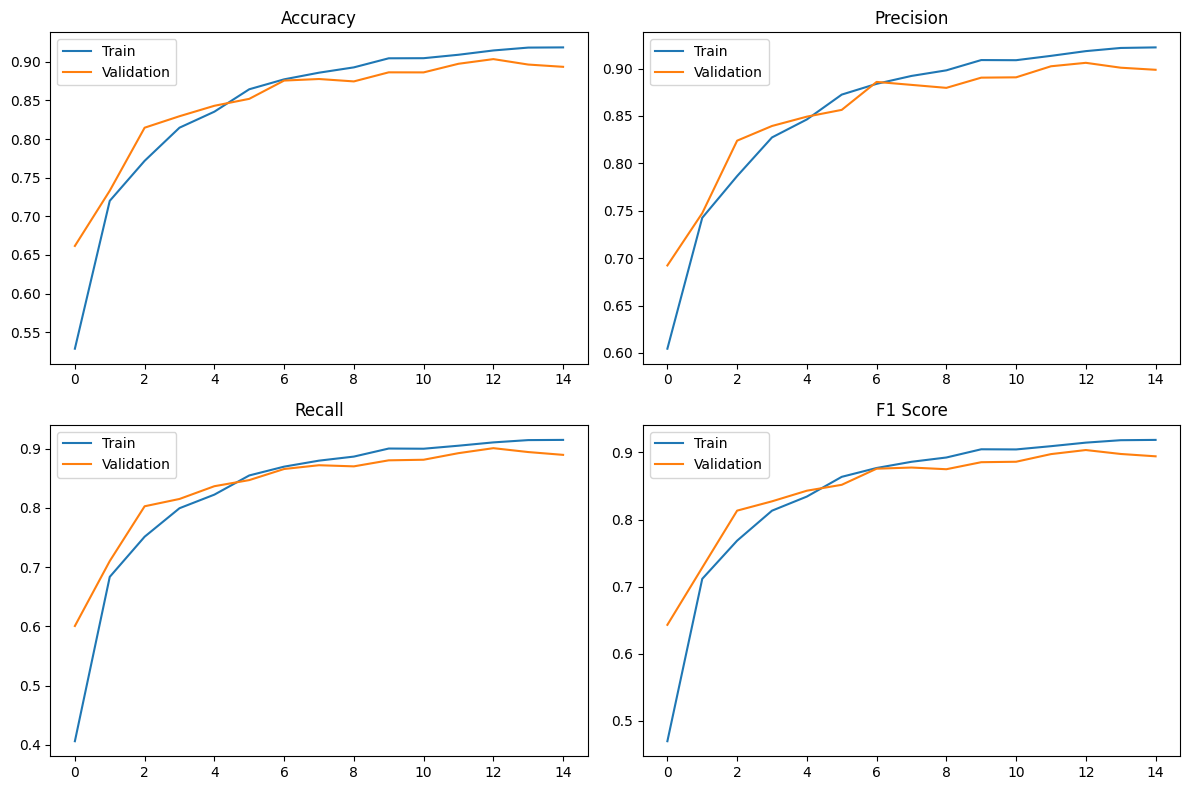

In [60]:
train_acc = history.history['accuracy']
train_recall = history.history['recall_m']
train_precision = history.history['precision_m']
train_f1 = history.history['f1_score']
val_acc = history.history['val_accuracy']
val_recall = history.history['val_recall_m']
val_precision = history.history['val_precision_m']
val_f1 = history.history['val_f1_score']

# Create a figure and subplot for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy
axs[0, 0].plot(train_acc, label='Train')
axs[0, 0].plot(val_acc, label='Validation')
axs[0, 0].set_title('Accuracy')
axs[0, 0].legend()

# Plot precision
axs[0, 1].plot(train_precision, label='Train')
axs[0, 1].plot(val_precision, label='Validation')
axs[0, 1].set_title('Precision')
axs[0, 1].legend()

# Plot recall
axs[1, 0].plot(train_recall, label='Train')
axs[1, 0].plot(val_recall, label='Validation')
axs[1, 0].set_title('Recall')
axs[1, 0].legend()

# Plot F1 score
axs[1, 1].plot(train_f1, label='Train')
axs[1, 1].plot(val_f1, label='Validation')
axs[1, 1].set_title('F1 Score')
axs[1, 1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [61]:
a2 = history.history['accuracy'][-1]
f2 = history.history['f1_score'][-1]
p2 = history.history['precision_m'][-1]
r2 = history.history['recall_m'][-1]


print('Accuracy = ' + str(a2))
print('Precision = ' + str(p2))
print('F1 Score = ' + str(f2))
print('Recall = ' + str(r2))

Accuracy = 0.9186705350875854
Precision = 0.9223446249961853
F1 Score = 0.9185765385627747
Recall = 0.9148763418197632


# ResNET (Residual Neural Network)

In [24]:
BATCH_SIZE = 64
IMAGE_SHAPE = (224, 224)

TRAIN_PATH = "output/train"
VAL_PATH = "output/val"

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_gen = datagen.flow_from_directory(directory = TRAIN_PATH, 
                                          class_mode="categorical",
                                          target_size = IMAGE_SHAPE,
                                          batch_size = BATCH_SIZE,
                                          color_mode='rgb',
                                          seed = 1234,
                                          shuffle = True)

val_gen = datagen.flow_from_directory(directory = VAL_PATH, 
                                          class_mode="categorical",
                                          target_size = IMAGE_SHAPE,
                                          batch_size = BATCH_SIZE,
                                          color_mode='rgb',
                                          seed = 1234,
                                          shuffle = True)

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Found 47658 images belonging to 15 classes.
Found 11919 images belonging to 15 classes.


In [31]:
resnet = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in resnet.layers:
    layer.trainable = False

# Add custom layers on top of ResNet
x = resnet.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(15, activation='softmax')(x)

# Create a new model
resnet_model = Model(inputs=resnet.input, outputs=predictions)

In [34]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1_score,recall_m,precision_m])

In [35]:
history_resnet = resnet_model.fit(train_gen, validation_data=val_gen, epochs=15, steps_per_epoch=len(train_gen), validation_steps=len(val_gen))

Epoch 1/15
745/745 [==============================] - 290s 384ms/step - loss: 1.0631 - accuracy: 0.5926 - f1_score: 0.5367 - recall_m: 0.4436 - precision_m: 0.7273 - val_loss: 0.7391 - val_accuracy: 0.6723 - val_f1_score: 0.6484 - val_recall_m: 0.5836 - val_precision_m: 0.7311
Epoch 2/15
745/745 [==============================] - 310s 416ms/step - loss: 0.7037 - accuracy: 0.6988 - f1_score: 0.6836 - recall_m: 0.6260 - precision_m: 0.7548 - val_loss: 0.7110 - val_accuracy: 0.7221 - val_f1_score: 0.7166 - val_recall_m: 0.6788 - val_precision_m: 0.7597
Epoch 3/15
745/745 [==============================] - 346s 465ms/step - loss: 0.6270 - accuracy: 0.7271 - f1_score: 0.7178 - recall_m: 0.6720 - precision_m: 0.7715 - val_loss: 0.5913 - val_accuracy: 0.7406 - val_f1_score: 0.7305 - val_recall_m: 0.6861 - val_precision_m: 0.7821
Epoch 4/15
745/745 [==============================] - 310s 416ms/step - loss: 0.5842 - accuracy: 0.7461 - f1_score: 0.7392 - recall_m: 0.6997 - precision_m: 0.7843 - 

In [ ]:
# resnet = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# for layer in resnet.layers:
#     layer.trainable = False
    
# x = resnet.output
# x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dense(512, activation='relu')(x) 
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(256, activation='relu')(x) 
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(128, activation='relu')(x) 
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(64, activation='relu')(x) 
# x = layers.Dropout(0.5)(x)

# predictions = layers.Dense(15, activation='softmax')(x)
# model = Model(inputs = resnet.input, outputs = predictions)


In [27]:

# model.compile(optimizer='adam',loss="categorical_crossentropy", metrics=['accuracy',f1_score,recall_m,precision_m])


In [ ]:
# history_resnet = model.fit(train_gen, validation_data=val_gen, epochs=15, steps_per_epoch=len(train_gen), validation_steps=len(val_gen))

In [36]:
resnet_model.save('model/ResNet.h5')

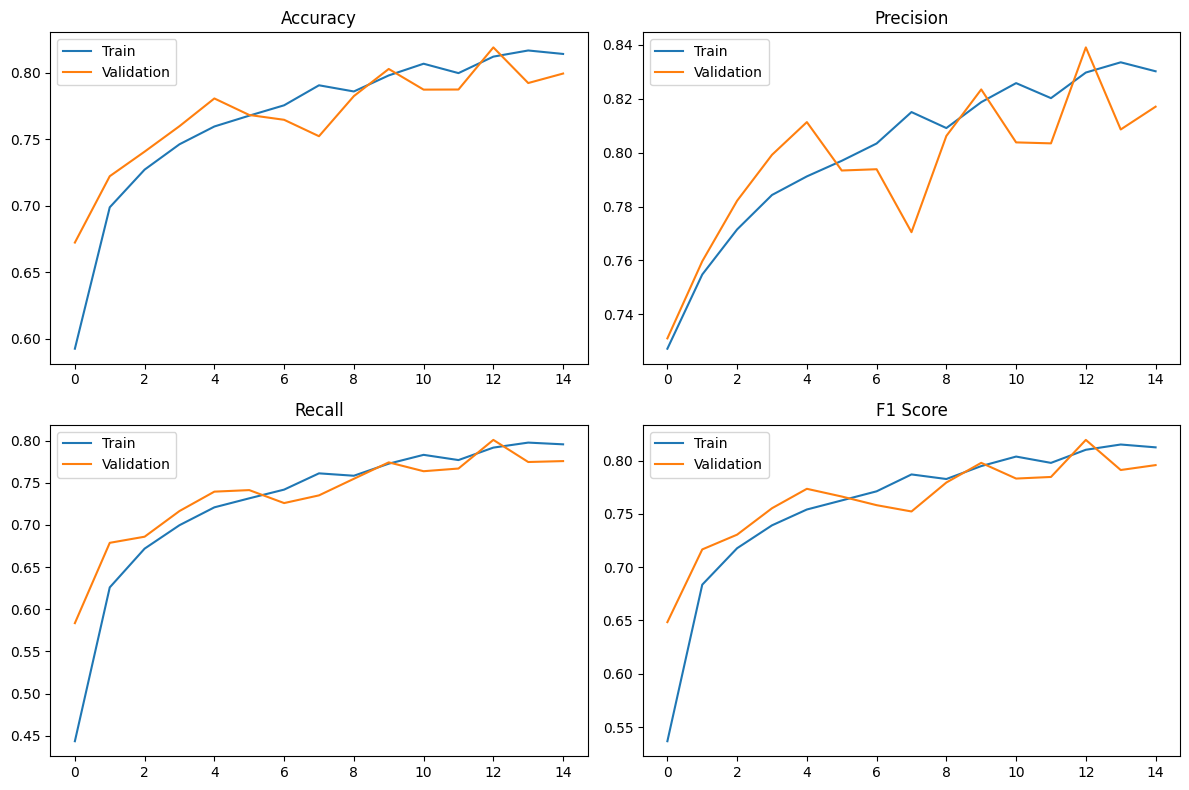

In [37]:
train_acc = history_resnet.history['accuracy']
train_recall = history_resnet.history['recall_m']
train_precision = history_resnet.history['precision_m']
train_f1 = history_resnet.history['f1_score']
val_acc = history_resnet.history['val_accuracy']
val_recall = history_resnet.history['val_recall_m']
val_precision = history_resnet.history['val_precision_m']
val_f1 = history_resnet.history['val_f1_score']

# Create a figure and subplot for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy
axs[0, 0].plot(train_acc, label='Train')
axs[0, 0].plot(val_acc, label='Validation')
axs[0, 0].set_title('Accuracy')
axs[0, 0].legend()

# Plot precision
axs[0, 1].plot(train_precision, label='Train')
axs[0, 1].plot(val_precision, label='Validation')
axs[0, 1].set_title('Precision')
axs[0, 1].legend()

# Plot recall
axs[1, 0].plot(train_recall, label='Train')
axs[1, 0].plot(val_recall, label='Validation')
axs[1, 0].set_title('Recall')
axs[1, 0].legend()

# Plot F1 score
axs[1, 1].plot(train_f1, label='Train')
axs[1, 1].plot(val_f1, label='Validation')
axs[1, 1].set_title('F1 Score')
axs[1, 1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [39]:
a3 = history_resnet.history['accuracy'][-1]
f3 = history_resnet.history['f1_score'][-1]
p3 = history_resnet.history['precision_m'][-1]
r3 = history_resnet.history['recall_m'][-1]


print('Accuracy = ' + str(a3))
print('Precision = ' + str(p3))
print('F1 Score = ' + str(f3))
print('Recall = ' + str(r3))

Accuracy = 0.8139451742172241
Precision = 0.8301525712013245
F1 Score = 0.8123766779899597
Recall = 0.7956335544586182


# Comparison

In [62]:
results ={'Accuracy': [a1,a2,a3],
 'Recall':[r1,r2,r3],
 'Precision': [p1,p2,p3],
    'F1' : [f1,f2,f3]}
index = ['CNN','Xception','ResNet']

In [63]:
results =pd.DataFrame(results,index=index)
print(results)

          Accuracy    Recall  Precision        F1
CNN       0.918671  0.914876   0.922345  0.918577
Xception  0.918671  0.914876   0.922345  0.918577
ResNet    0.813945  0.795634   0.830153  0.812377


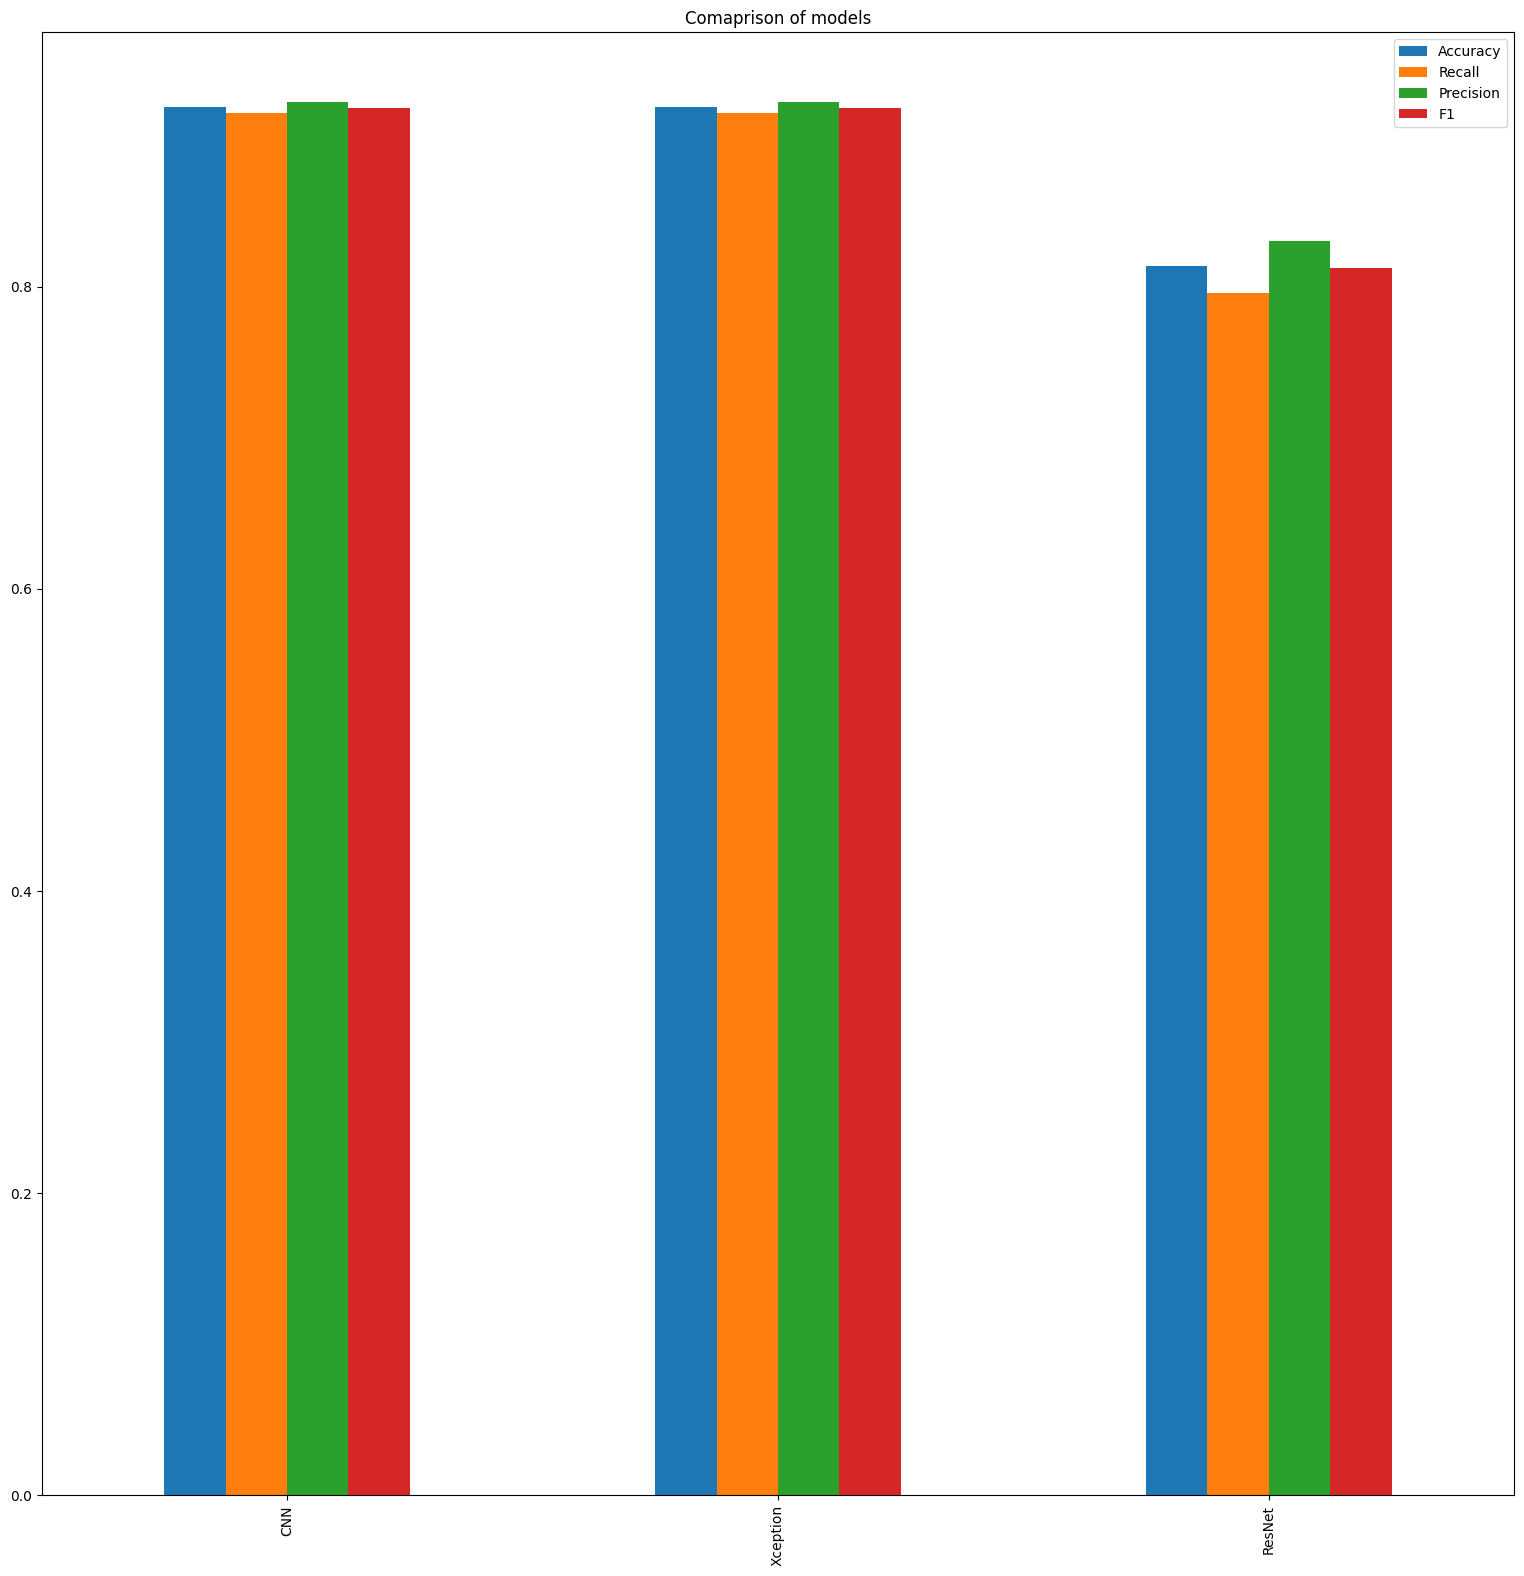

In [64]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('Final Result.png')

array([<Axes: title={'center': 'Accuracy'}>,
       <Axes: title={'center': 'Recall'}>,
       <Axes: title={'center': 'Precision'}>,
       <Axes: title={'center': 'F1'}>], dtype=object)

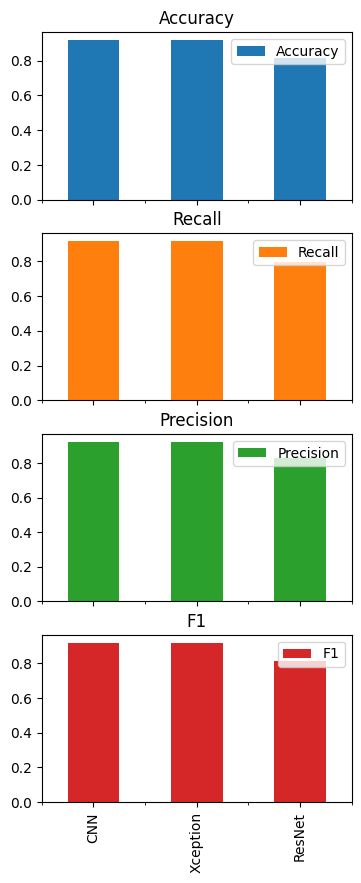

In [65]:
results.plot(subplots=True,kind ='bar',figsize=(4,10))

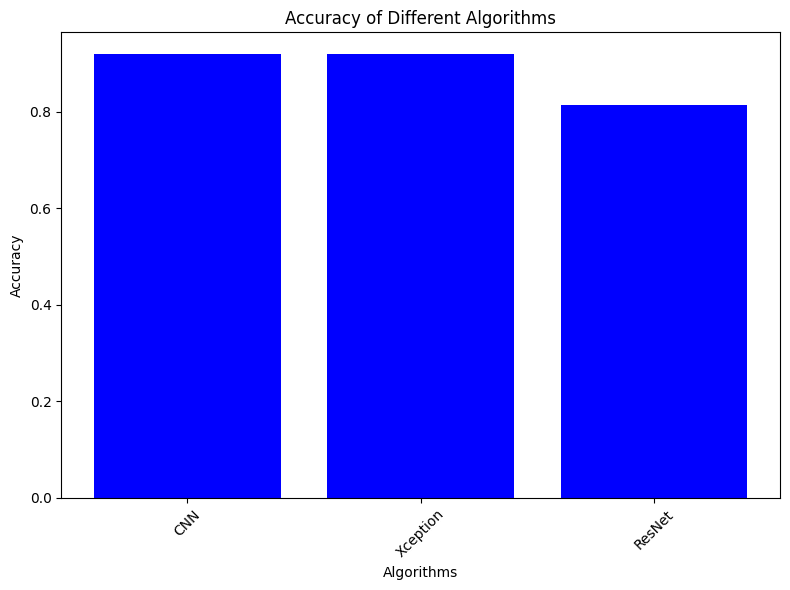

In [66]:

accuracy_values = results['Accuracy']
accuracy_df = pd.DataFrame({'Algorithms': index, 'Accuracy': accuracy_values})

plt.figure(figsize=(8, 6))
plt.bar(accuracy_df['Algorithms'], accuracy_df['Accuracy'], color='blue')
plt.title('Accuracy of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

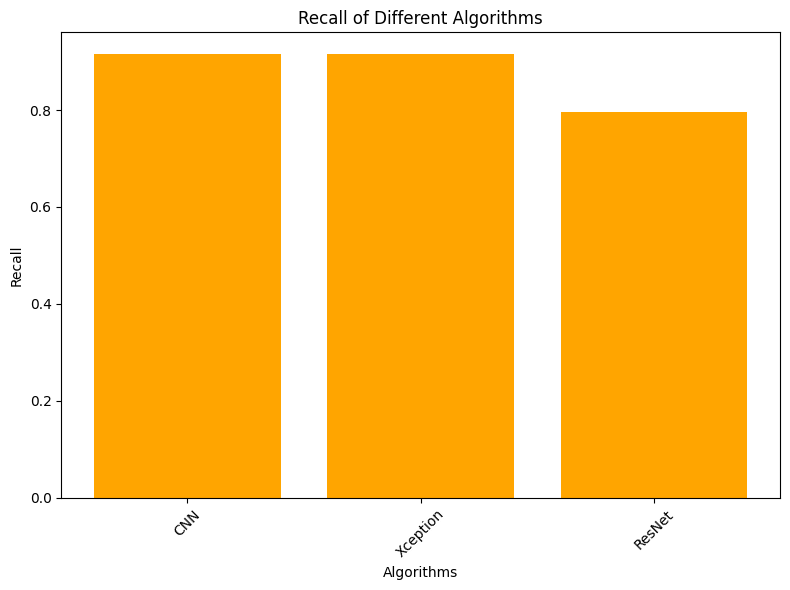

In [67]:
recall_values = results['Recall']
recall_df = pd.DataFrame({'Algorithms': index, 'Recall': recall_values})

plt.figure(figsize=(8, 6))
plt.bar(recall_df['Algorithms'], recall_df['Recall'], color='orange')
plt.title('Recall of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

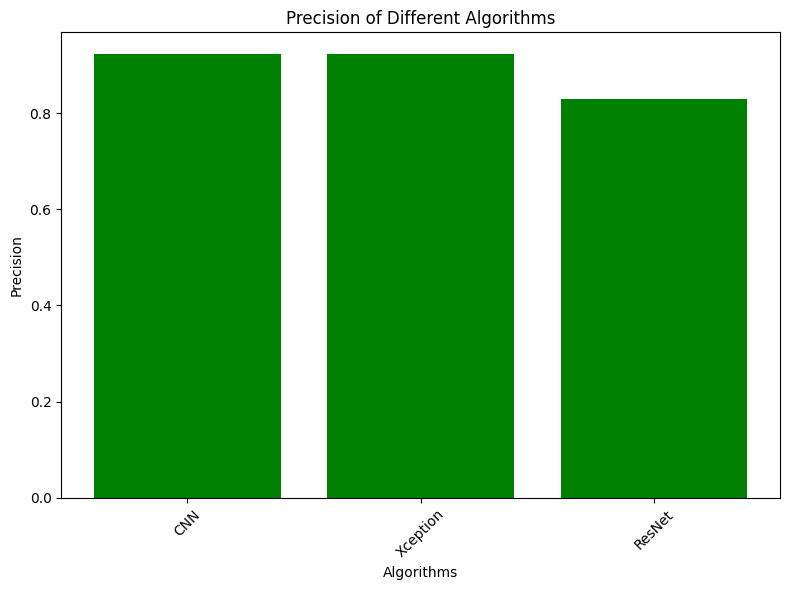

In [68]:
precision_values = results['Precision']
precision_df = pd.DataFrame({'Algorithms': index, 'Precision': precision_values})

plt.figure(figsize=(8, 6))
plt.bar(precision_df['Algorithms'], precision_df['Precision'], color='green')
plt.title('Precision of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

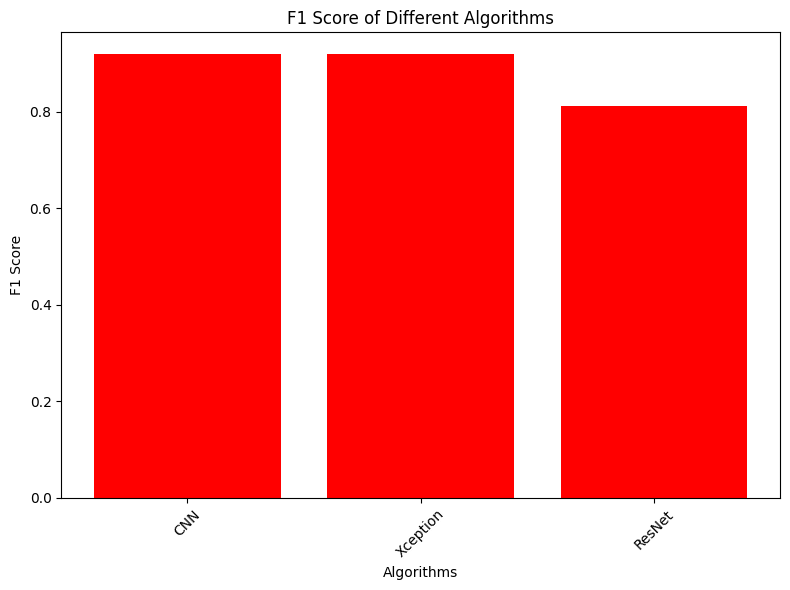

In [69]:
f1_values = results['F1']
f1_df = pd.DataFrame({'Algorithms': index, 'F1 Score': f1_values})

plt.figure(figsize=(8, 6))
plt.bar(f1_df['Algorithms'], f1_df['F1 Score'], color='red')
plt.title('F1 Score of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()